<a href="https://colab.research.google.com/github/DininduChamikara/Agglomerative-Hierarchical-Clustering/blob/main/Divisive/IM_2018_057_Divisive_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Divisive Clustering**

The divisive clustering algorithm is a top-down clustering approach, initially, all the points in the dataset belong to one cluster and split is performed recursively as one moves down the hierarchy

We will first import the required libraries. To create a data set we need to import pandas library. We need to import matplot library to show data in a diagram (here we use scatter plot diagram)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance_matrix
%matplotlib inline

Load the data and and look at the rows

In [73]:
data = pd.read_csv('std_data_2.csv')
data.head(20)

,height,weight
0,1.70,70
1,1.50,45
2,1.51,50
3,1.69,68
4,1.60,62
5,1.53,55
6,1.55,59
7,1.72,80
8,1.49,44
9,1.68,67


So, let’s first normalize the data and bring all the variables to the same scale

In [74]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head(20)

,height,weight
0,0.024279,0.999705
1,0.033315,0.999445
2,0.030186,0.999544
3,0.024845,0.999691
4,0.025798,0.999667
5,0.027807,0.999613
6,0.026262,0.999655
7,0.021495,0.999769
8,0.033844,0.999427
9,0.025067,0.999686


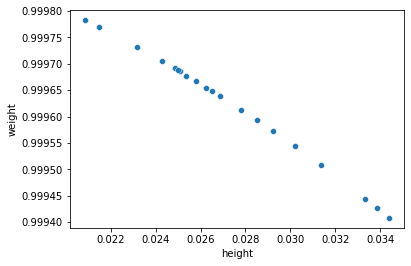

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data_scaled.height,
                    y=data_scaled.weight,
                    data=data_scaled)

Let's generate proximity matrix. proximity matrix shows the difference between data points 

In [76]:
proximity_matrix = pd.DataFrame(distance_matrix(data_scaled.values, data_scaled.values), index=data_scaled.index, columns=data_scaled.index)
proximity_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.009040,0.005910,0.000567,0.001520,0.003530,0.001984,0.002784,0.009570,0.000788,0.001098,0.007081,0.004942,0.001091,0.002213,0.004230,0.002609,0.003430,0.010124,0.000714
1,0.009040,0.000000,0.003130,0.008473,0.007520,0.005510,0.007056,0.011824,0.000530,0.008252,0.007942,0.001959,0.004099,0.010131,0.006827,0.004810,0.006431,0.012470,0.001084,0.008326
2,0.005910,0.003130,0.000000,0.005343,0.004390,0.002380,0.003926,0.008694,0.003660,0.005121,0.004812,0.001171,0.000968,0.007001,0.003697,0.001680,0.003301,0.009340,0.004214,0.005196
3,0.000567,0.008473,0.005343,0.000000,0.000953,0.002963,0.001417,0.003351,0.009003,0.000222,0.000531,0.006514,0.004375,0.001658,0.001646,0.003663,0.002042,0.003997,0.009557,0.000147
4,0.001520,0.007520,0.004390,0.000953,0.000000,0.002010,0.000464,0.004304,0.008050,0.000731,0.000422,0.005562,0.003422,0.002610,0.000693,0.002710,0.001089,0.004950,0.008604,0.000806
5,0.003530,0.005510,0.002380,0.002963,0.002010,0.000000,0.001546,0.006314,0.006040,0.002742,0.002432,0.003551,0.001411,0.004621,0.001317,0.000700,0.000921,0.006960,0.006594,0.002816
6,0.001984,0.007056,0.003926,0.001417,0.000464,0.001546,0.000000,0.004768,0.007586,0.001196,0.000886,0.005097,0.002957,0.003075,0.000229,0.002246,0.000625,0.005415,0.008140,0.001270
7,0.002784,0.011824,0.008694,0.003351,0.004304,0.006314,0.004768,0.000000,0.012354,0.003573,0.003882,0.009866,0.007726,0.001694,0.004997,0.007014,0.005393,0.000646,0.012908,0.003498
8,0.009570,0.000530,0.003660,0.009003,0.008050,0.006040,0.007586,0.012354,0.000000,0.008781,0.008472,0.002488,0.004628,0.010660,0.007357,0.005340,0.006961,0.013000,0.000554,0.008856
9,0.000788,0.008252,0.005121,0.000222,0.000731,0.002742,0.001196,0.003573,0.008781,0.000000,0.000310,0.006293,0.004153,0.001879,0.001424,0.003441,0.001821,0.004219,0.009336,0.000075


Now, here we are going to create 2 clusters. Initially a one cluster including all the data points and another cluster with no data points.

In [77]:
cluster_1 = data_scaled
cluster_2 = pd.DataFrame()
cluster_2['Index'] = []
cluster_2['Mean Distance'] = []

We then store the mean distances for each point to every other point in the normalized data set.

In [78]:
stu_index = []
stu_distance_avg = []
for stu in proximity_matrix:
  stu_index.append(stu)
  stu_distance_avg.append(proximity_matrix[stu].mean())

first_iter_avgs = pd.DataFrame(stu_distance_avg, index=stu_index, columns=['Mean Distance'])
first_iter_avgs

,Mean Distance
0,0.003661
1,0.006271
2,0.004197
3,0.003321
4,0.003041
5,0.003218
6,0.002994
7,0.005780
8,0.006694
9,0.003218


In [79]:
cluster_1 = data_scaled
cluster_2 = pd.DataFrame()
data_scaled

,height,weight
0,0.024279,0.999705
1,0.033315,0.999445
2,0.030186,0.999544
3,0.024845,0.999691
4,0.025798,0.999667
5,0.027807,0.999613
6,0.026262,0.999655
7,0.021495,0.999769
8,0.033844,0.999427
9,0.025067,0.999686


Now we need to find the point with the highest mean distance and place it into cluster 2

In [80]:
# Gets the maximum mean distance
max_val = first_iter_avgs['Mean Distance'].max()  

# Records the most dissimilar student 
dissimilar_stu = first_iter_avgs.loc[first_iter_avgs['Mean Distance'] == max_val].index 
print('The most dissimilar student:\n\n', first_iter_avgs.loc[first_iter_avgs['Mean Distance'] == max_val], '\n\n')

for stu_id in dissimilar_stu:
  entry = cluster_1.loc[cluster_1.index == stu_id]
  cluster_2 = pd.concat([cluster_2, entry])

cluster_1

The most dissimilar student:

     Mean Distance
18       0.007193 




,height,weight
0,0.024279,0.999705
1,0.033315,0.999445
2,0.030186,0.999544
3,0.024845,0.999691
4,0.025798,0.999667
5,0.027807,0.999613
6,0.026262,0.999655
7,0.021495,0.999769
8,0.033844,0.999427
9,0.025067,0.999686


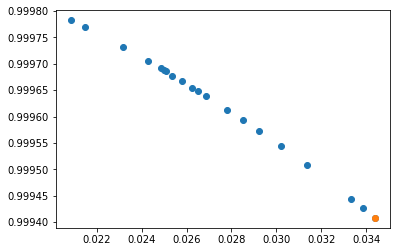

In [81]:
plt.scatter(cluster_1['height'], cluster_1['weight'])
plt.scatter(cluster_2['height'], cluster_2['weight'])
plt.show()

Next, for each of the other points in the old cluster, we find the mean distance from the other points (alpha). Similarly, we find the mean distance from each of the points in the old cluster with that of the new cluster (Beta)

In [82]:
cluster1_proximity_matrix = pd.DataFrame(distance_matrix(cluster_1.values, cluster_1.values), index=cluster_1.index, columns=cluster_1.index)
cluster1_proximity_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.009040,0.005910,0.000567,0.001520,0.003530,0.001984,0.002784,0.009570,0.000788,0.001098,0.007081,0.004942,0.001091,0.002213,0.004230,0.002609,0.003430,0.010124,0.000714
1,0.009040,0.000000,0.003130,0.008473,0.007520,0.005510,0.007056,0.011824,0.000530,0.008252,0.007942,0.001959,0.004099,0.010131,0.006827,0.004810,0.006431,0.012470,0.001084,0.008326
2,0.005910,0.003130,0.000000,0.005343,0.004390,0.002380,0.003926,0.008694,0.003660,0.005121,0.004812,0.001171,0.000968,0.007001,0.003697,0.001680,0.003301,0.009340,0.004214,0.005196
3,0.000567,0.008473,0.005343,0.000000,0.000953,0.002963,0.001417,0.003351,0.009003,0.000222,0.000531,0.006514,0.004375,0.001658,0.001646,0.003663,0.002042,0.003997,0.009557,0.000147
4,0.001520,0.007520,0.004390,0.000953,0.000000,0.002010,0.000464,0.004304,0.008050,0.000731,0.000422,0.005562,0.003422,0.002610,0.000693,0.002710,0.001089,0.004950,0.008604,0.000806
5,0.003530,0.005510,0.002380,0.002963,0.002010,0.000000,0.001546,0.006314,0.006040,0.002742,0.002432,0.003551,0.001411,0.004621,0.001317,0.000700,0.000921,0.006960,0.006594,0.002816
6,0.001984,0.007056,0.003926,0.001417,0.000464,0.001546,0.000000,0.004768,0.007586,0.001196,0.000886,0.005097,0.002957,0.003075,0.000229,0.002246,0.000625,0.005415,0.008140,0.001270
7,0.002784,0.011824,0.008694,0.003351,0.004304,0.006314,0.004768,0.000000,0.012354,0.003573,0.003882,0.009866,0.007726,0.001694,0.004997,0.007014,0.005393,0.000646,0.012908,0.003498
8,0.009570,0.000530,0.003660,0.009003,0.008050,0.006040,0.007586,0.012354,0.000000,0.008781,0.008472,0.002488,0.004628,0.010660,0.007357,0.005340,0.006961,0.013000,0.000554,0.008856
9,0.000788,0.008252,0.005121,0.000222,0.000731,0.002742,0.001196,0.003573,0.008781,0.000000,0.000310,0.006293,0.004153,0.001879,0.001424,0.003441,0.001821,0.004219,0.009336,0.000075


In [83]:
cluster2_proximity_matrix = pd.DataFrame(distance_matrix(cluster_1.values, cluster_2.values), index=cluster_1.index, columns=['beta'])
cluster2_proximity_matrix

,beta
0,0.010124
1,0.001084
2,0.004214
3,0.009557
4,0.008604
5,0.006594
6,0.008140
7,0.012908
8,0.000554
9,0.009336


In [84]:
stu_index = []
stu_distance_avg = []
for stu in cluster1_proximity_matrix:
  stu_index.append(stu)
  stu_distance_avg.append(cluster1_proximity_matrix[stu].mean())

df_alpha = pd.DataFrame(stu_distance_avg, index=stu_index, columns=['alpha'])
df_alpha

,alpha
0,0.003661
1,0.006271
2,0.004197
3,0.003321
4,0.003041
5,0.003218
6,0.002994
7,0.005780
8,0.006694
9,0.003218


In [86]:
#pd.merge(left=df_alpha, right=cluster2_proximity_matrix, left_on=df_alpha.index, right_on=clus
merged_df = df_alpha  
merged_df['beta'] = cluster2_proximity_matrix
diff = []
for index in merged_df.index:
  diff.append(merged_df['alpha'][index] - merged_df['beta'][index])
merged_df['alpha-beta'] = diff
merged_df

,alpha,beta,alpha-beta
0,0.003661,0.010124,-0.006463
1,0.006271,0.001084,0.005187
2,0.004197,0.004214,-0.000017
3,0.003321,0.009557,-0.006236
4,0.003041,0.008604,-0.005564
5,0.003218,0.006594,-0.003376
6,0.002994,0.008140,-0.005146
7,0.005780,0.012908,-0.007129
8,0.006694,0.000554,0.006140
9,0.003218,0.009336,-0.006118


In [87]:
# Records the most dissimilar student
dissimilar_stu = merged_df.loc[merged_df['alpha-beta'] > 0] 
dissimilar_stu

,alpha,beta,alpha-beta
1,0.006271,0.001084,0.005187
8,0.006694,0.000554,0.006140
11,0.004900,0.003043,0.001857
18,0.007193,0.000000,0.007193


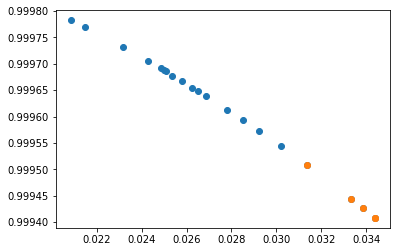

In [88]:
for stu_id in dissimilar_stu.index:
  entry = cluster_1.loc[cluster_1.index == stu_id]
  cluster_2 = pd.concat([cluster_2, entry])
  # cluster_1.drop(stu_id, inplace=True)

plt.scatter(cluster_1['height'], cluster_1['weight'])
plt.scatter(cluster_2['height'], cluster_2['weight'])
plt.show()

Below is the scatter plot after iterating  5  more time(s):




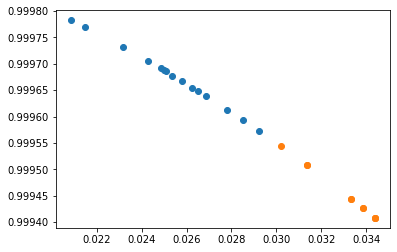

In [95]:
# number of iterations
itr = 5


# This loop will repeatedly try to form clusters by iterating 'itr' number of times
for i in range(itr):
  cluster1_proximity_matrix = pd.DataFrame(distance_matrix(cluster_1.values, cluster_1.values), index=cluster_1.index, columns=cluster_1.index)
  cluster1_proximity_matrix
  cluster2_proximity_matrix = pd.DataFrame(distance_matrix(cluster_1.values, cluster_2.values), index=cluster_1.index)
  cluster2_proximity_matrix['beta'] = cluster2_proximity_matrix.mean(axis=1)  # The mean of the rows are calculated and stored. That's basically what 'axis=1' does.
  stu_index = []
  stu_dist_avg = []

  for stu in cluster1_proximity_matrix:
    stu_index.append(stu)
    stu_dist_avg.append(cluster1_proximity_matrix[stu].mean())

  df_alpha = pd.DataFrame(stu_dist_avg, index=stu_index, columns=['alpha'])
  df_alpha
  merged_df = df_alpha
  merged_df['beta'] = cluster2_proximity_matrix['beta']
  diff = []
  for index in merged_df.index:
    diff.append(merged_df['alpha'][index] - merged_df['beta'][index])
  merged_df['alpha-beta'] = diff
  merged_df
  dissimilar_stu = merged_df.loc[merged_df['alpha-beta'] > 0] # Records the most dissimilar student
  dissimilar_stu
  for stu_id in dissimilar_stu.index:
    entry = cluster_1.loc[cluster_1.index == stu_id]
    cluster_2 = pd.concat([cluster_2, entry])
    cluster_1.drop(stu_id, inplace=True)

print('Below is the scatter plot after iterating ', itr, ' more time(s):\n\n')
plt.scatter(cluster_1['height'], cluster_1['weight'])
plt.scatter(cluster_2['height'], cluster_2['weight'])
plt.show()

In [41]:
merged_df

,alpha,beta,alpha-beta
0,0.001897,0.007778,-0.005881
3,0.001654,0.007211,-0.005557
4,0.001662,0.006258,-0.004596
5,0.002777,0.004248,-0.001471
6,0.001794,0.005794,-0.003999
7,0.003730,0.010562,-0.006832
9,0.001601,0.006989,-0.005388
10,0.001601,0.006680,-0.005078
13,0.002520,0.008868,-0.006348
14,0.001892,0.005565,-0.003673
